## Analysing Every data sets

In [ ]:
import pandas as pd

# File paths
file_paths = {
    "PCOS Survey": "CLEAN- PCOS SURVEY SPREADSHEET.csv",
    "Cleaned Data": "Cleaned-Data.csv",
    "PCOS Data": "PCOS_data.csv",
    "PCOS Extended": "PCOS_extended_dataset.csv",
    "PCOS Infertility": "PCOS_infertility.csv",
    "PCOS OpenFDA": "PCOS_OpenFDA.csv",
    "PCOS Prediction": "pcos_prediction_dataset.csv"
}

# Load datasets into pandas dataframes
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display basic info for each dataset
datasets_info = {name: df.info() for name, df in datasets.items()}

# Display first few rows of each dataset to understand their structure
datasets_samples = {name: df.head() for name, df in datasets.items()}

datasets_samples


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Age (in Years)                                                                     465 non-null    int64  
 1   Weight (in Kg)                                                                     465 non-null    float64
 2   Height (in Cm / Feet)                                                              465 non-null    float64
 3   Can you tell us your blood group ?                                                 465 non-null    int64  
 4   After how many months do you get your periods?
(select 1- if every month/regular)  465 non-null    int64  
 5   Have you gained weight recently?                                                   465 non-null    int64  

{'PCOS Survey':    Age (in Years)  Weight (in Kg)  Height (in Cm / Feet)  \
 0              21            47.0                  168.0   
 1              21            45.0                  156.0   
 2              17            37.0                  162.0   
 3              28            54.0                  160.0   
 4              45            40.0                  150.0   
 
    Can you tell us your blood group ?  \
 0                                  13   
 1                                  11   
 2                                  15   
 3                                  15   
 4                                  13   
 
    After how many months do you get your periods?\n(select 1- if every month/regular)  \
 0                                                  1                                    
 1                                                  1                                    
 2                                                  1                                    
 3 

## Merging 3 datasets as Core_PCOS_Dataset

In [ ]:
import pandas as pd

# Load the datasets
pcos_data = pd.read_csv("PCOS_data.csv")
pcos_extended = pd.read_csv("PCOS_extended_dataset.csv")
pcos_infertility = pd.read_csv("PCOS_infertility.csv")

# Concatenating the datasets
core_pcos_df = pd.concat([pcos_data, pcos_extended, pcos_infertility], axis=0, ignore_index=True)

# Dropping duplicates based on unique patient identifier
if "Patient File No." in core_pcos_df.columns:
    core_pcos_df = core_pcos_df.drop_duplicates(subset=["Patient File No."], keep="first")

# Save the merged dataset
core_pcos_df.to_csv("Core_PCOS_Dataset.csv", index=False)

print("Core PCOS Dataset has been saved as 'Core_PCOS_Dataset.csv'")

Core PCOS Dataset has been saved as 'Core_PCOS_Dataset.csv'


## CLeaning the CORE_PCOS_Dataset

In [ ]:

core_pcos_df = pd.concat([pcos_data, pcos_extended, pcos_infertility], axis=0, ignore_index=True)

if "Patient File No." in core_pcos_df.columns:
    core_pcos_df = core_pcos_df.drop_duplicates(subset=["Patient File No."], keep="first")

for col in core_pcos_df.select_dtypes(include=["float64", "int64"]).columns:
    core_pcos_df[col].fillna(core_pcos_df[col].median(), inplace=True)

if "Unnamed: 44" in core_pcos_df.columns:
    core_pcos_df.drop(columns=["Unnamed: 44"], inplace=True)

for col in ["II    beta-HCG(mIU/mL)", "AMH(ng/mL)"]:
    if col in core_pcos_df.columns:
        core_pcos_df[col] = pd.to_numeric(core_pcos_df[col], errors='coerce')

core_pcos_df.to_csv("Core_PCOS_Dataset_Cleaned.csv", index=False)

print("Core PCOS Dataset has been cleaned and saved as 'Core_PCOS_Dataset_Cleaned.csv'")


Core PCOS Dataset has been cleaned and saved as 'Core_PCOS_Dataset_Cleaned.csv'


<ipython-input-4-87e6c3790c34>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  core_pcos_df[col].fillna(core_pcos_df[col].median(), inplace=True)


## Checking for Outliers

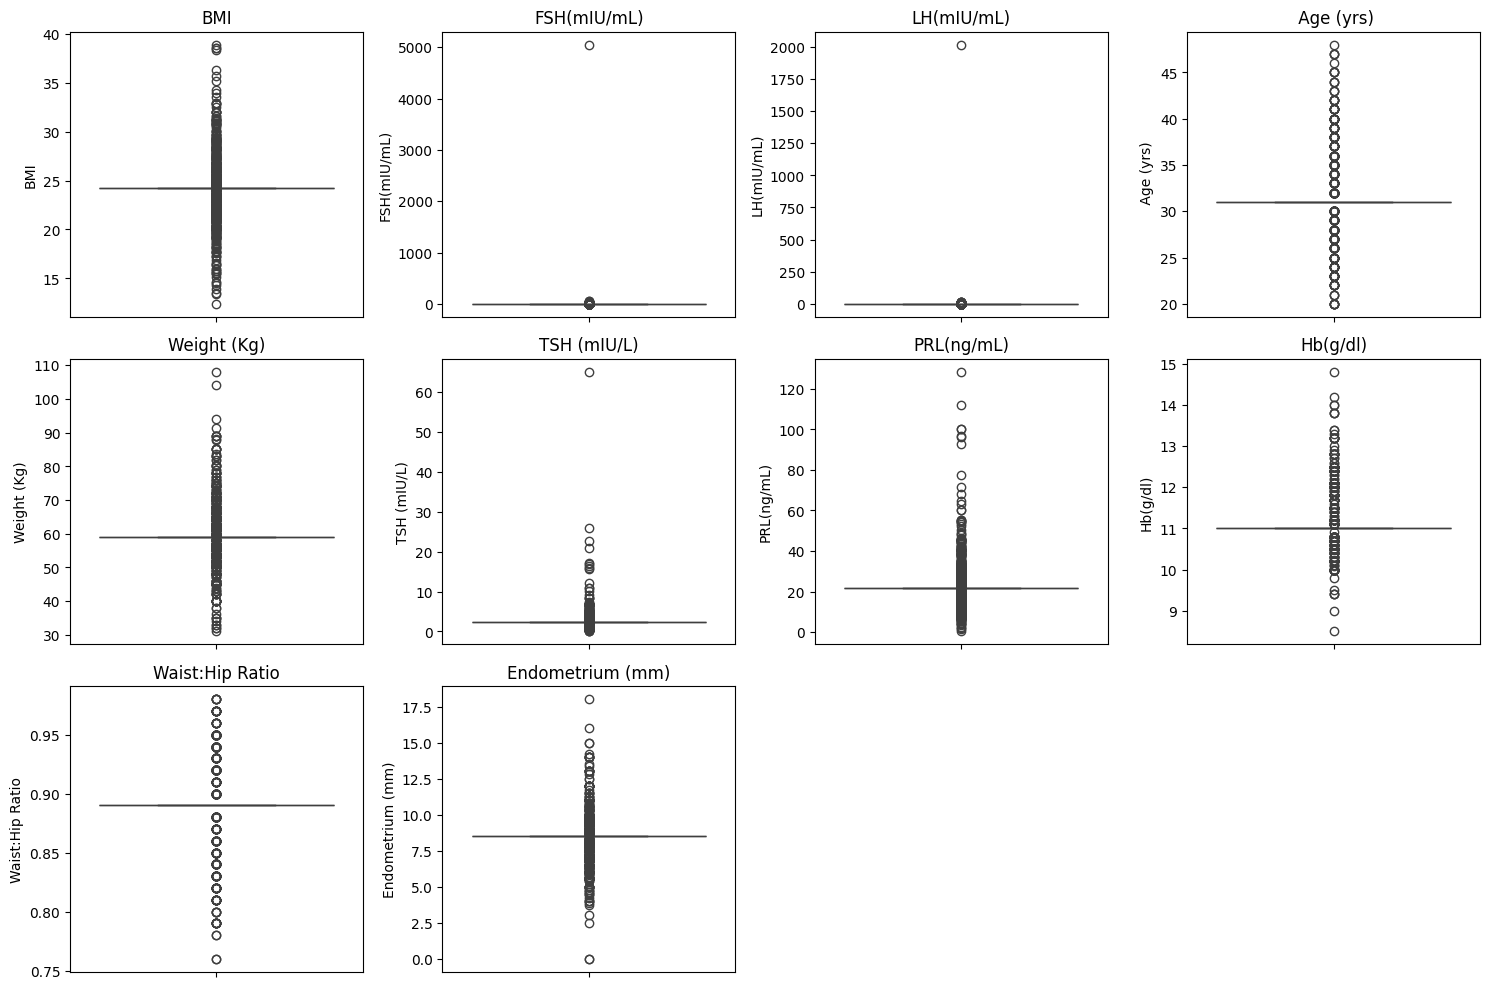

Core PCOS Dataset has been cleaned, analyzed for outliers, and visualized using boxplots.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_pcos_df = pd.read_csv("Core_PCOS_Dataset_Cleaned.csv")

outlier_data = {}
for col in cleaned_pcos_df.select_dtypes(include=["float64", "int64"]).columns:
    Q1 = cleaned_pcos_df[col].quantile(0.25)
    Q3 = cleaned_pcos_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = cleaned_pcos_df[(cleaned_pcos_df[col] < lower_bound) | (cleaned_pcos_df[col] > upper_bound)]
    outlier_data[col] = len(outliers)

outlier_cols = ["BMI", "FSH(mIU/mL)", "LH(mIU/mL)", " Age (yrs)", "Weight (Kg)",
                "TSH (mIU/L)", "PRL(ng/mL)", "Hb(g/dl)", "Waist:Hip Ratio", "Endometrium (mm)"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=cleaned_pcos_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

print("Core PCOS Dataset has been cleaned, analyzed for outliers, and visualized using boxplots.")


## Now Merging the next datasets

In [ ]:
# Load the necessary datasets
pcos_survey_path = "CLEAN- PCOS SURVEY SPREADSHEET.csv"
cleaned_data_path = "Cleaned-Data.csv"

pcos_survey_df = pd.read_csv(pcos_survey_path)
cleaned_data_df = pd.read_csv(cleaned_data_path)

# Merging datasets on common lifestyle-related attributes
lifestyle_diet_df = pd.concat([pcos_survey_df, cleaned_data_df], axis=0, ignore_index=True)

# Dropping duplicate entries based on lifestyle-related key identifiers
lifestyle_diet_df = lifestyle_diet_df.drop_duplicates(subset=["Age (in Years)", "Weight (in Kg)", "Height (in Cm / Feet)"], keep="first")

# Saving the merged Lifestyle & Diet Dataset
lifestyle_diet_merged_path = "Lifestyle_Diet_Dataset.csv"
lifestyle_diet_df.to_csv(lifestyle_diet_merged_path, index=False)

# Return the merged file path
lifestyle_diet_merged_path


'Lifestyle_Diet_Dataset.csv'

## Cleaning the lifesttyle dataset

In [ ]:
# Dropping duplicate or irrelevant columns
columns_to_remove = ["Age", "Weight_kg", "Height_ft"]  # These are redundant with existing columns
lifestyle_diet_df = lifestyle_diet_df.drop(columns=[col for col in columns_to_remove if col in lifestyle_diet_df.columns])

# Renaming columns to standardize names
lifestyle_diet_df.columns = [col.strip().replace("\n", " ").replace("?", "").replace("/", "_").replace("(", "").replace(")", "").replace("-", "_") for col in lifestyle_diet_df.columns]

# Handling missing values
# Fill numerical missing values with the median
for col in lifestyle_diet_df.select_dtypes(include=["float64", "int64"]).columns:
    lifestyle_diet_df[col].fillna(lifestyle_diet_df[col].median(), inplace=True)

# Fill categorical missing values with the mode
for col in lifestyle_diet_df.select_dtypes(include=["object"]).columns:
    lifestyle_diet_df[col].fillna(lifestyle_diet_df[col].mode()[0], inplace=True)

# Converting categorical data to appropriate types
categorical_cols = ["Marital_Status", "PCOS", "Family_History_PCOS", "Menstrual_Irregularity", "Hormonal_Imbalance", "Hyperandrogenism", "Hirsutism", "Mental_Health", "Conception_Difficulty", "Insulin_Resistance", "Diabetes", "Childhood_Trauma", "Cardiovascular_Disease", "Vegetarian", "Exercise_Frequency", "Exercise_Type", "Exercise_Duration", "Sleep_Hours", "Stress_Level", "Smoking", "Exercise_Benefit", "PCOS_Medication"]

for col in categorical_cols:
    if col in lifestyle_diet_df.columns:
        lifestyle_diet_df[col] = lifestyle_diet_df[col].astype(str)

# Save the cleaned dataset
cleaned_lifestyle_diet_path = "Lifestyle_Diet_Dataset_Cleaned.csv"
lifestyle_diet_df.to_csv(cleaned_lifestyle_diet_path, index=False)

# Return the cleaned file path
cleaned_lifestyle_diet_path


<ipython-input-8-8f2c59cfff7c>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lifestyle_diet_df[col].fillna(lifestyle_diet_df[col].median(), inplace=True)
<ipython-input-8-8f2c59cfff7c>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

'Lifestyle_Diet_Dataset_Cleaned.csv'

## now mersging next dataset (medication)

In [ ]:
# Load the PCOS Medication & Reactions Dataset
pcos_medication_path = "PCOS_OpenFDA.csv"
pcos_medication_df = pd.read_csv(pcos_medication_path)

# Display basic info to understand missing values and data types
pcos_medication_df.info()

# Display first few rows to examine inconsistencies
pcos_medication_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drug Name  50 non-null     object 
 1   Age        32 non-null     float64
 2   Age Unit   32 non-null     float64
 3   Gender     50 non-null     int64  
 4   Reaction   50 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


,Drug Name,Age,Age Unit,Gender,Reaction
0,DEPAKOTE,41.0,801.0,1,Medication residue present
1,TOFACITINIB CITRATE,66.0,801.0,2,Osteomyelitis
2,METFORMIN,74.0,801.0,1,"Erysipelas, Sepsis"
3,DEPAKOTE,NaN,NaN,1,"Balance disorder, Gait disturbance, Gait distu..."
4,DEPAKOTE,63.0,801.0,2,Weight increased


In [ ]:
# Dropping the unnecessary 'Age Unit' column
pcos_medication_df.drop(columns=["Age Unit"], inplace=True)

# Renaming columns for standardization
pcos_medication_df.columns = ["Drug_Name", "Age", "Gender", "Reaction"]

# Handling missing values in Age (replace with median age)
pcos_medication_df["Age"].fillna(pcos_medication_df["Age"].median(), inplace=True)

# Convert Gender column (assuming 1=Male, 2=Female)
gender_map = {1: "Male", 2: "Female"}
pcos_medication_df["Gender"] = pcos_medication_df["Gender"].map(gender_map)

# Save the cleaned dataset
cleaned_pcos_medication_path = "PCOS_Medication_Reactions_Cleaned.csv"
pcos_medication_df.to_csv(cleaned_pcos_medication_path, index=False)

# Return the cleaned file path
cleaned_pcos_medication_path


<ipython-input-11-ca9b3a06a258>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pcos_medication_df["Age"].fillna(pcos_medication_df["Age"].median(), inplace=True)


'PCOS_Medication_Reactions_Cleaned.csv'

## next dataset global PCOS prediction

In [ ]:
# Load the Global PCOS Demographics & Predictions Dataset
global_pcos_path = "pcos_prediction_dataset.csv"
global_pcos_df = pd.read_csv(global_pcos_path)

# Display basic info to understand missing values and data types
global_pcos_df.info()

# Display first few rows to examine inconsistencies
global_pcos_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No


## Cleaning

In [ ]:
# Standardizing column names
global_pcos_df.columns = [col.strip().replace(" ", "_").replace("/", "_") for col in global_pcos_df.columns]

# Ensuring categorical values are properly formatted
categorical_cols = ["BMI", "Menstrual_Regularity", "Hirsutism", "Acne_Severity", "Family_History_of_PCOS",
                    "Insulin_Resistance", "Stress_Levels", "Urban_Rural", "Socioeconomic_Status",
                    "Awareness_of_PCOS", "Fertility_Concerns", "Ethnicity", "Diagnosis"]

for col in categorical_cols:
    global_pcos_df[col] = global_pcos_df[col].astype(str).str.lower().str.strip()

# Ensuring numerical columns are correctly formatted
global_pcos_df["Lifestyle_Score"] = global_pcos_df["Lifestyle_Score"].astype(int)
global_pcos_df["Undiagnosed_PCOS_Likelihood"] = global_pcos_df["Undiagnosed_PCOS_Likelihood"].astype(float)

# Save the cleaned dataset
cleaned_global_pcos_path = "Global_PCOS_Demographics_Cleaned.csv"
global_pcos_df.to_csv(cleaned_global_pcos_path, index=False)

# Return the cleaned file path
cleaned_global_pcos_path


'Global_PCOS_Demographics_Cleaned.csv'